In [17]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Important for simulation to run inline
%matplotlib ipympl 

In [20]:
class Simulation():
    def __init__(self, topography, wd, vx, vy):
        """
        A class that contains for a simulation:
        - topography:   2D array
        - wd:           3D array
        - vx:           3D array
        - vy:           3D array
        """
        self.topography = topography
        self.wd = wd
        self.vx = vx
        self.vy = vy

    def plot_animation(self, cmap_topo="terrain", cmap_flood="Blues"):
        fig, axs = plt.subplots(1,2,figsize=(14,6))
        axs[0].imshow(self.topography, cmap=cmap_topo, origin="lower")

        # Create list of images that are animated
        imgs = []
        for i in range(self.wd.shape[0]):
            im = axs[1].imshow(self.wd[i], cmap=cmap_flood, origin='lower', animated=True)

            if i==0:
                axs[1].imshow(self.wd[i], cmap=cmap_flood, origin='lower')
            imgs.append([im])

        # Create the animation
        ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
                                        repeat_delay=1000)
        return ani

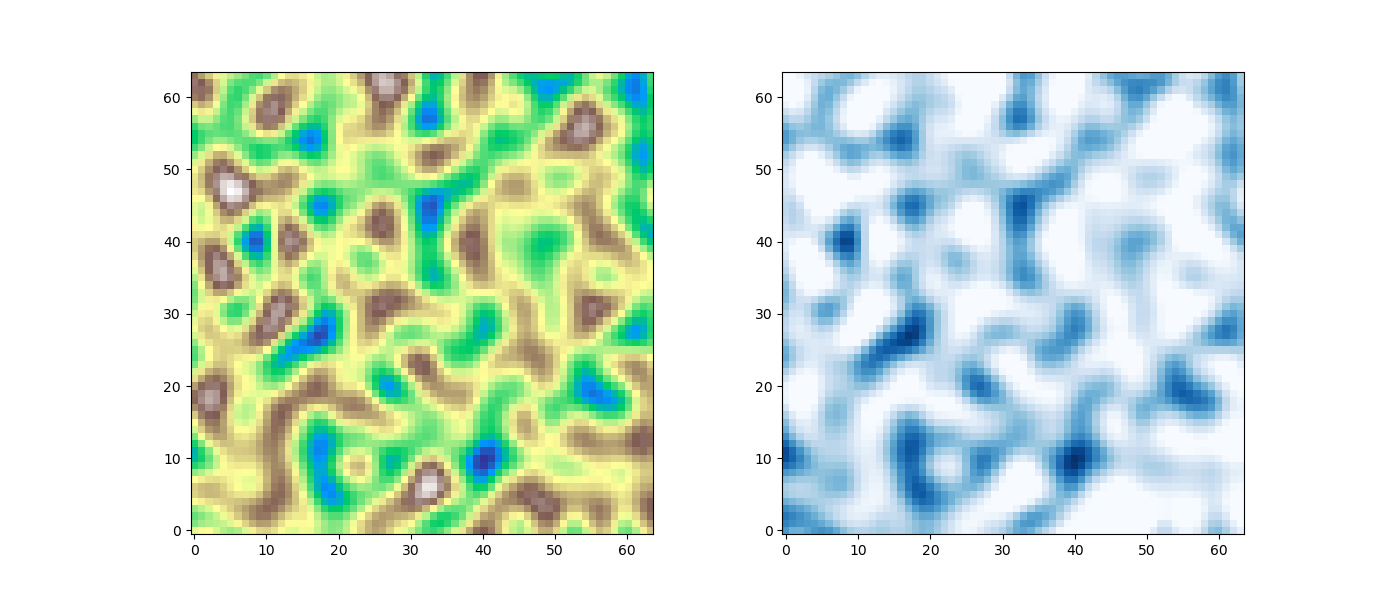

In [21]:
# Test
number_grids = 64
save_folder = "../data/raw_datasets"
sim = 42

topo = np.loadtxt(f"{save_folder}\\DEM\\DEM_{sim}.txt")[:, 2].reshape(number_grids,number_grids)
wd = np.loadtxt(f"{save_folder}\\WD\\WD_{sim}.txt").reshape(-1,number_grids,number_grids)
vx = np.loadtxt(f"{save_folder}\\VX\\VX_{sim}.txt").reshape(-1,number_grids,number_grids)
vy = np.loadtxt(f"{save_folder}\\vy\\vy_{sim}.txt").reshape(-1,number_grids,number_grids)

test_sim = Simulation(topo, wd, vx, vy)
ani = test_sim.plot_animation()